In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data from x_y.csv
df = pd.read_csv('data_sets/x_y.csv')

df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
df.describe()

,x,y
count,1000.000000,999.000000
mean,53.771157,50.319804
std,113.747929,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,75.000000,74.475252
max,3530.157369,108.871618


In [4]:
# Check for NaN values in X and y
print("NaN values in X:", df['x'].isna().sum())
print("NaN values in y:", df['y'].isna().sum())


NaN values in X: 0
NaN values in y: 1


In [5]:
# Drop rows where y has NaN values
df = df.dropna(subset=['y'])
df.describe()


,x,y
count,999.000000,999.000000
mean,50.291291,50.319804
std,28.808925,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,74.500000,74.475252
max,100.000000,108.871618


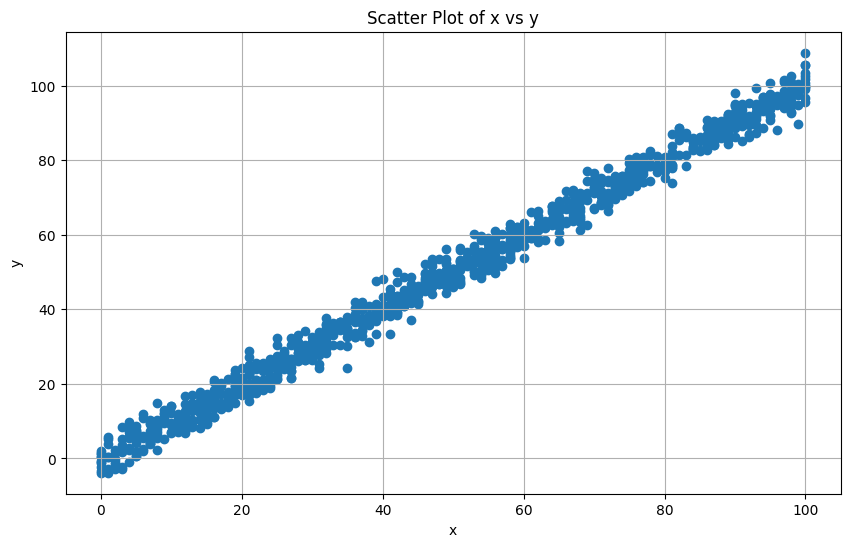

In [6]:
# Create a scatter plot of x vs y

plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.grid(True)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [8]:
# Prepare X and y
X = df['x'].values.reshape(-1, 1)  # Features
y = df['y'].values  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Model Performance Metrics:')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.2f}')
print(f'\nModel Coefficients:')
print(f'Slope: {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')


Model Performance Metrics:
Mean Squared Error: 9.00
Root Mean Squared Error: 3.00
R-squared Score: 0.99

Model Coefficients:
Slope: 1.01
Intercept: -0.39


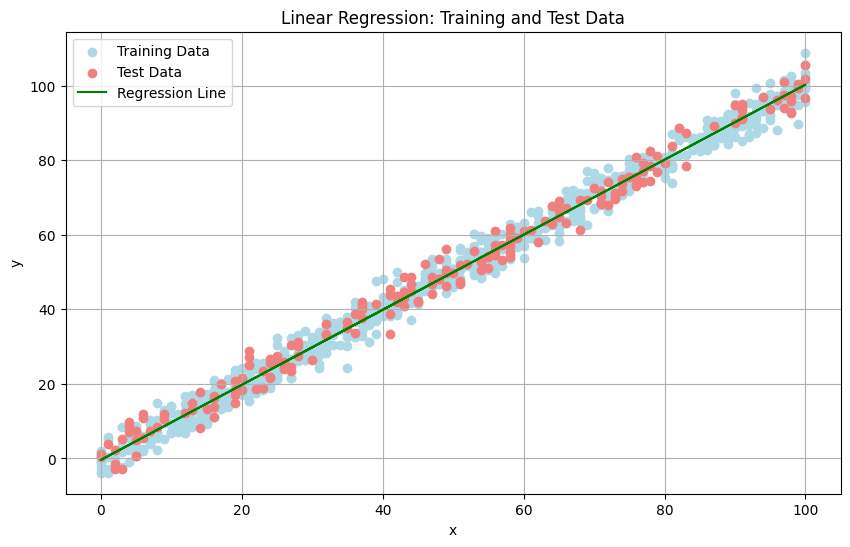

In [11]:

# Plot the regression line along with training and test data
plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='lightblue', label='Training Data')
plt.scatter(X_test, y_test, color='lightcoral', label='Test Data')
plt.plot(X, model.predict(X), color='green', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Training and Test Data')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
tree_model = DecisionTreeRegressor(max_depth=3)  # Try changing depth!
tree_model.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [14]:
y_pred = tree_model.predict(X_test)

In [15]:
# Metrics
mse = mean_squared_error(y, tree_model.predict(X))
mae = mean_absolute_error(y, tree_model.predict(X))
r2 = r2_score(y, tree_model.predict(X))

print("Decision Tree Regression Metrics:")
print(f"  Mean Squared Error (MSE): {mse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  R² Score: {r2:.4f}")

Decision Tree Regression Metrics:
  Mean Squared Error (MSE): 20.4138
  Mean Absolute Error (MAE): 3.7063
  R² Score: 0.9759


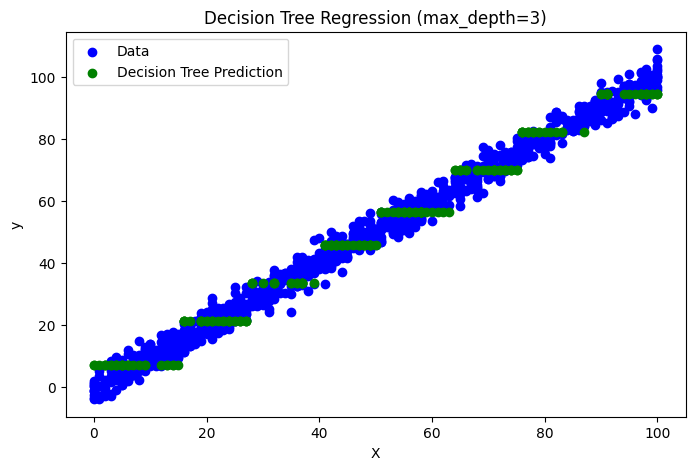

In [16]:
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data')
plt.scatter(X_test, y_pred, color='green', label='Decision Tree Prediction')
plt.title("Decision Tree Regression (max_depth=3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Les données sont séparées en régions et le modèle prédit une valeur constante dans chaque région.
Le Max_Depth correspond à la profondeur de l'arbre.
On restera généralement entre 1 et 5, jamais plus de 10.

In [17]:
from sklearn.linear_model import BayesianRidge

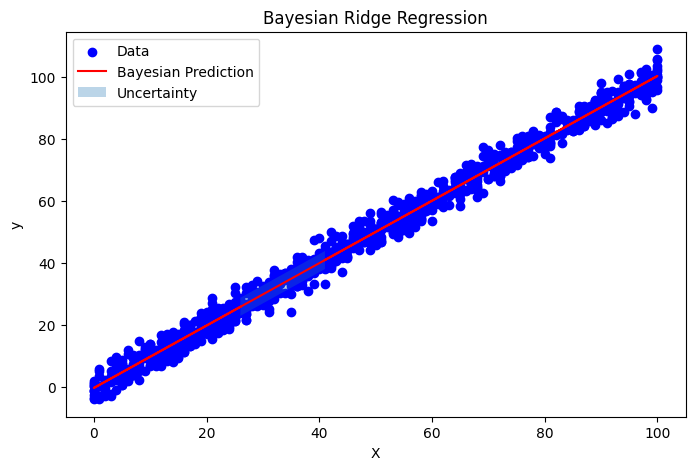

In [18]:
# Fit Bayesian Ridge Regression
model = BayesianRidge()
model.fit(X, y)

# Predict
y_pred, std = model.predict(X_test, return_std=True)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Bayesian Prediction')
plt.fill_between(X_test.ravel(), y_pred - std, y_pred + std, alpha=0.3, label='Uncertainty')
plt.legend()
plt.title("Bayesian Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()